In [90]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [91]:
#Cargar conjunto de datos de Tensor Flow
fashion_mnist = keras.datasets.fashion_mnist #traemos un dataset de ropa
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #Dividiremos la data en train y test y lo cargamos

In [92]:
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','shirt','Sneaker','Bag','Ankle boot']

In [93]:
train_images.shape #Tenemos 60000 datos

(60000, 28, 28)

In [98]:
#Cada etiqueta es un integro entre 0 y 9 (tipo de ropa)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

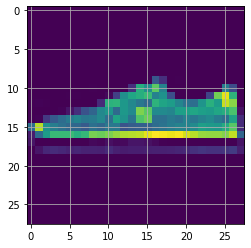

In [94]:
#Mostrando los datos
plt.figure() #Traer la imagen y poder setearla
plt.imshow(train_images[14]) #Mostrando los datos de entrenamiento
plt.grid(True)

In [96]:
#Normalizando los pixels -> range(0,256)
#Se divide entre 255.0 para normalizar los valores de los píxeles y trabajar con datos entre 0 y 1
#osea teniamos los pixeles de 0 a 255 , ahora estaran en 0 y 1
train_images = train_images / 255.0 
test_images = test_images / 255.0

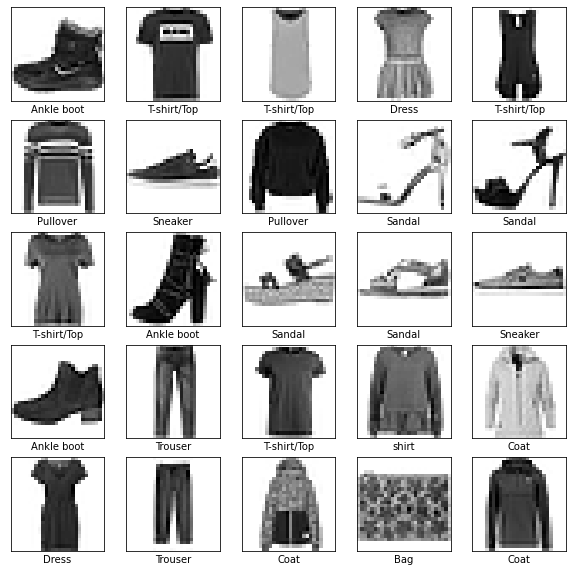

In [97]:
%matplotlib inline

plt.figure(figsize = (10,10)) #Definiendo tamaño de la figura
for i in range(25):  #Mostraremos las primeras 25 figuras
    plt.subplot(5, 5, i + 1) #Colocando las subimagenes por filas y columnas
    plt.xticks([]) #Quita los datos numericos de cada x
    plt.yticks([]) #Quita los datos numericos de cada y
    plt.grid(False)
    plt.imshow(train_images[i] , cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

In [ ]:
## Crear modelo secuencial
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), #transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles).Es decir , aplanando los pixeles
                          keras.layers.Dense(128, activation = tf.nn.relu), 
                          keras.layers.Dense(10, activation = tf.nn.softmax)])

In [ ]:
#keras.layers.Dense
#Estas estan densamente conectadas, o completamente conectadas. La primera capa Dense tiene 128 nodos (o neuronas). 
#La segunda (y ultima) capa es una capa de 10 nodos softmax que devuelve un arreglo de 10 probabilidades que suman a 1.
#Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

In [101]:
#Compilación del modelo
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
#Loss function —Esto mide que tan exacto es el modelo durante el entrenamiento. 
#Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.

#Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.

#Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas. 
#Se escoge el tipo de metrica que se desea usar, El siguiente ejemplo usa accuracy (exactitud) , 
#la fraccion de la imagenes que son correctamente clasificadas.

In [102]:
#Entrenamiento
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 1s 666us/step - loss: 0.2880 - accuracy: 0.8931
Epoch 2/5
1875/1875 [==============================] - 1s 617us/step - loss: 0.2778 - accuracy: 0.8968
Epoch 3/5
1875/1875 [==============================] - 1s 622us/step - loss: 0.2689 - accuracy: 0.8992
Epoch 4/5
1875/1875 [==============================] - 1s 619us/step - loss: 0.2556 - accuracy: 0.9053
Epoch 5/5
1875/1875 [==============================] - 1s 694us/step - loss: 0.2477 - accuracy: 0.9075


In [103]:
#Evaluación del modelo:
test_loss, test_acc = model.evaluate( test_images, test_labels )
#accuracy -> Me dara el porcentaje de acierto de la red entrenada con respecto a los datos reales del test junto a sus labels 

313/313 [==============================] - 0s 416us/step - loss: 0.3413 - accuracy: 0.8832


In [104]:
#Predicción del modelo:
prediction = model.predict(test_images)

In [106]:
prediction #Tenemos una lista de listas , en cada lista hay un arreglo del 0 al 9 , los datos son porcentajes el cual estara la probabilidad maxima que sea la prenda

array([[2.0352930e-07, 6.5835594e-11, 2.8691118e-09, ..., 1.1900518e-02,
        1.0503567e-06, 9.7793728e-01],
       [1.7410551e-06, 1.1403343e-13, 9.9654371e-01, ..., 2.1461070e-20,
        2.6786786e-09, 1.5024166e-16],
       [2.7526557e-06, 9.9999607e-01, 5.6860091e-07, ..., 2.5444443e-26,
        2.2138827e-12, 1.7774233e-15],
       ...,
       [7.1871351e-04, 1.8855978e-08, 1.4052501e-05, ..., 2.8629355e-08,
        9.9912137e-01, 5.9216881e-12],
       [6.8216036e-07, 9.9992263e-01, 2.9190929e-07, ..., 6.3535989e-14,
        3.7119237e-09, 1.5609571e-09],
       [2.2024965e-06, 3.1150102e-09, 1.0349744e-08, ..., 3.7326358e-04,
        6.4767301e-05, 3.5728915e-06]], dtype=float32)

In [108]:
#Explicandolo mejor:
prediction[0]

array([2.0352930e-07, 6.5835594e-11, 2.8691118e-09, 1.1510908e-10,
       2.7445081e-08, 1.0160723e-02, 2.0658167e-07, 1.1900518e-02,
       1.0503567e-06, 9.7793728e-01], dtype=float32)

In [ ]:
#una prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. 
#Se puede revisar cual tiene el nivel mas alto de confianza:

In [110]:
np.argmax(prediction[0])

9

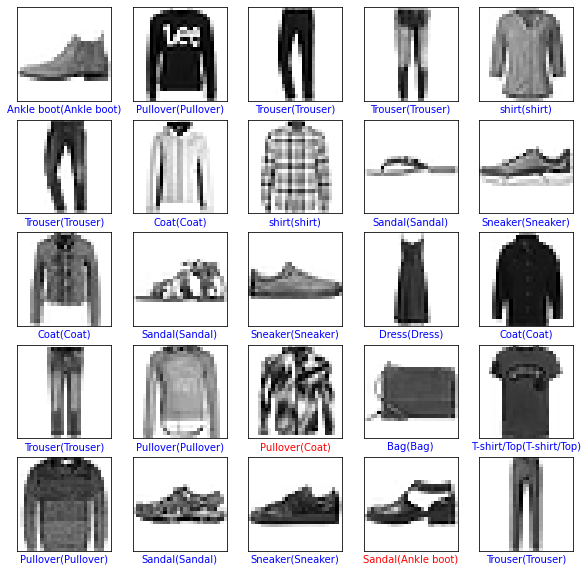

In [116]:
#Verificando los errores y aciertos en grafico
plt.figure(figsize = (10,10)) #Definiendo tamaño de la figura
for i in range(25):  #Mostraremos las primeras 25 figuras
    plt.subplot(5, 5, i + 1) #Colocando las subimagenes por filas y columnas
    plt.xticks([]) #Quita los datos numericos de cada x
    plt.yticks([]) #Quita los datos numericos de cada y
    plt.grid(False)
    plt.imshow(test_images[i] , cmap = plt.cm.binary)
    predicted_label = np.argmax(prediction[i]) # nos da el index del valor maximo del array el cual es la probabilidad maxima 
    true_label = test_labels[i] #El indice de el arreglo de la probabilidad maxima por prenda se comparara con el labels en forma numerica
    if predicted_label == true_label: #Si acerto en la prediccion
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('{}({})'.format(class_names[predicted_label],class_names[true_label]),color=color)

In [ ]:
#Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [124]:
# Grab an image from the test dataset.
img = test_images[4]

print(img.shape)

(28, 28)


In [125]:
#Los modelos de tf.keras son optimizados sobre batch o bloques, o coleciones de ejemplos por vez. 
#De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

In [126]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [127]:
#Ahora prediga la etiqueta correcta para esta imagen:
predictions_single = model.predict(img)

print(predictions_single)

[[6.9851264e-02 1.2300855e-04 4.6406124e-02 3.8243912e-02 1.0761902e-02
  9.1358977e-08 8.3366251e-01 5.4338805e-08 9.5085788e-04 1.9777059e-07]]


In [128]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

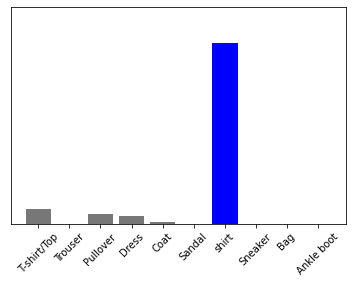

In [129]:
plot_value_array(4, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [130]:
np.argmax(predictions_single[0])

6